In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# filename: dataframe
dataframes = {}

# Read each CSV in activation_data directory
# get number of files in directory
import os
directory = "static_activation_stats"
files = []
try:
    # Runs if CSVs are in director "activation_data/"
    for filename in os.listdir(directory):
        files.append(filename)

    for file in files:
        dataframes[file] = pd.read_csv(directory + "/" + file)
    
except:
    # If files our not in a directory, this branch will trigger
    files = ['activation_statistics_0.csv',
 'activation_statistics_1.csv',
 'activation_statistics_19.csv',
 'activation_statistics_2.csv',
 'activation_statistics_29.csv',
 'activation_statistics_3.csv',
 'activation_statistics_39.csv',
 'activation_statistics_4.csv',
 'activation_statistics_49.csv',
 'activation_statistics_5.csv',
 'activation_statistics_6.csv',
 'activation_statistics_7.csv',
 'activation_statistics_8.csv',
 'activation_statistics_9.csv']
    
    for file in files:
        dataframes[file] = pd.read_csv(file)
    

print("Read", len(dataframes), "files")

Read 50 files


In [3]:
# Combine all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes.values(), keys=range(len(dataframes)))
combined_df.reset_index(inplace=True)
combined_df.rename(columns={'level_0': 'timestep'}, inplace=True)
combined_df.drop(columns=['level_1'], inplace=True)

# Reverse-index timesteps for correct ordering
combined_df['timestep'] = combined_df['timestep'].max() - combined_df['timestep']

In [4]:
# Function for basic summary statistics
def summarize_data(df):
    summary = df.describe(percentiles=[0.02, 0.05, 0.95, 0.98, 0.995])
    print("Summary Statistics:")
    print(summary)
    return summary

# Function to visualize trends across timesteps
def visualize_trends(df, statistic_columns=['mean', 'std', 'min', 'max']):
    trend_data = df.groupby('timestep')[statistic_columns].mean().sort_index(ascending=False)
    
    plt.figure(figsize=(10, 6))
    for col in statistic_columns:
        plt.plot(trend_data.index, trend_data[col], label=col, marker='o')
    
    plt.title('Activation Statistics Trends Across Timesteps (Reversed Indexing)')
    plt.xlabel('Timestep (Descending)')
    plt.ylabel('Activation Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to filter and analyze by layer type
def analyze_layer_type(df, layer_type):
    filtered_df = df[df['layer_type'] == layer_type]
    print(f"Summary for Layer Type: {layer_type}")
    summarize_data(filtered_df)
    visualize_trends(filtered_df)


Summary Statistics:
           timestep     layer_num          mean           std           min  \
count  14100.000000  14100.000000  14100.000000  14100.000000  14100.000000   
mean      24.500000    432.843972     -0.000932      1.136052    -21.631012   
std       14.431381    247.144664      0.101512      1.151676     60.421231   
min        0.000000      3.000000     -1.562584      0.045581   -753.893250   
2%         0.980000     23.000000     -0.275646      0.102360   -172.119015   
5%         2.000000     45.000000     -0.124011      0.172907    -82.942510   
50%       24.500000    453.500000      0.000893      0.820124     -7.139585   
95%       47.000000    809.000000      0.121697      3.182951     -1.516286   
98%       48.020000    830.000000      0.209145      4.058849     -0.805089   
99.5%     49.000000    839.000000      0.332933      8.397709     -0.403153   
max       49.000000    843.000000      0.749056     17.517302     -0.272704   

                max  percentile

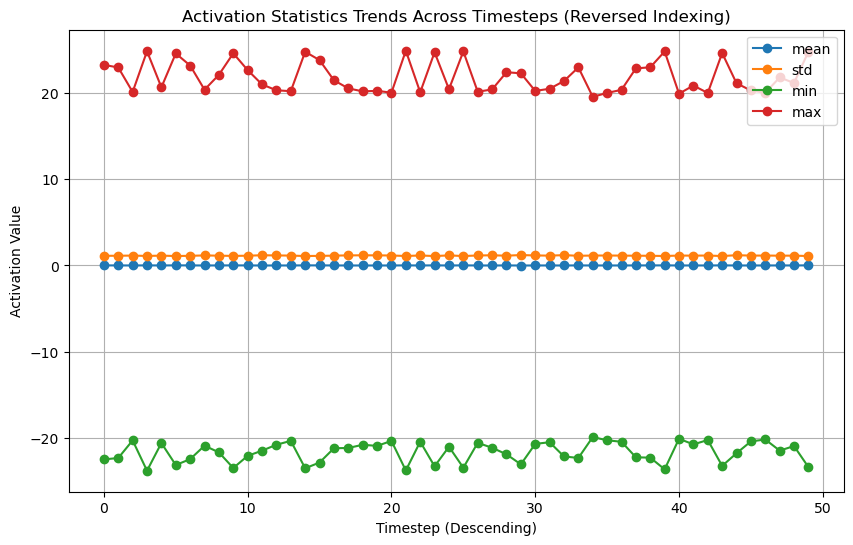

Summary for Layer Type: Conv2d
Summary Statistics:
          timestep    layer_num         mean          std          min  \
count  3300.000000  3300.000000  3300.000000  3300.000000  3300.000000   
mean     24.500000   427.712121    -0.015803     1.701756   -43.906707   
std      14.433057   226.645127     0.160665     1.691626    94.446477   
min       0.000000     8.000000    -1.562584     0.311295  -753.893250   
2%        0.980000    14.000000    -0.415042     0.453576  -435.192591   
5%        2.000000    59.000000    -0.194406     0.493773  -219.618272   
50%      24.500000   422.500000    -0.005087     1.293463   -15.763761   
95%      47.000000   800.000000     0.138168     3.995477    -4.104532   
98%      48.020000   810.000000     0.313260     8.478653    -3.629879   
99.5%    49.000000   843.000000     0.681662    11.709486    -2.824560   
max      49.000000   843.000000     0.749056    17.517302    -2.339358   

               max  percentile_1  percentile_2  percentile_5

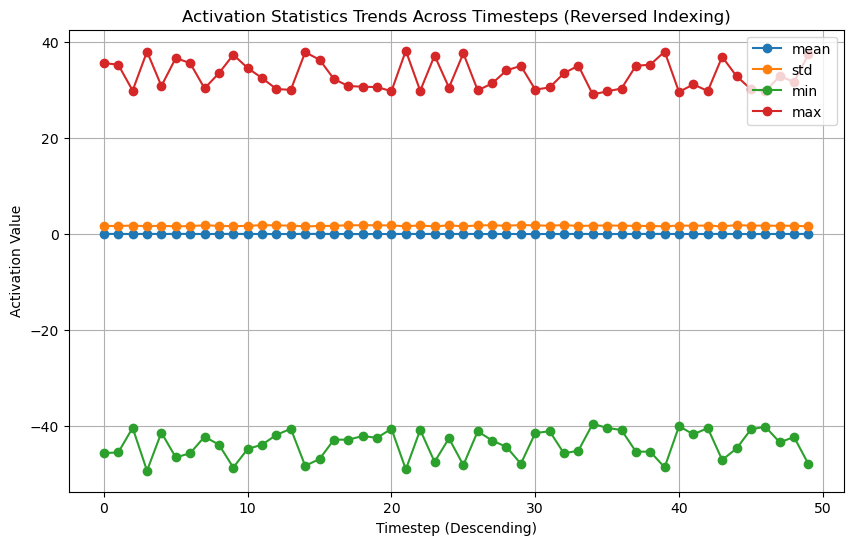

In [5]:
# Example usage
# Summarize combined data
summary = summarize_data(combined_df)

# Visualize trends for all data
visualize_trends(combined_df)

# Analyze a specific layer type (e.g., "Conv2d")
analyze_layer_type(combined_df, "Conv2d")

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot activation value distributions (histogram)
def plot_activation_distribution(df, layer_type=None):
    if layer_type:
        df = df[df['layer_type'] == layer_type]
    plt.figure(figsize=(10, 6))
    sns.histplot(df['mean'], bins=50, kde=True, label='Mean')
    sns.histplot(df['std'], bins=50, kde=True, label='Std Dev', color='orange')
    plt.title(f'Activation Distribution{" - " + layer_type if layer_type else ""}')
    plt.xlabel('Activation Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot temporal evolution of activation ranges
def plot_temporal_ranges(df, layer_type=None):
    if layer_type:
        df = df[df['layer_type'] == layer_type]
    temporal_stats = df.groupby('timestep')[['min', 'max', 'mean', 'std']].mean().sort_index(ascending=False)
    
    plt.figure(figsize=(12, 6))
    plt.plot(temporal_stats.index, temporal_stats['min'], label='Min', marker='o')
    plt.plot(temporal_stats.index, temporal_stats['max'], label='Max', marker='o')
    plt.plot(temporal_stats.index, temporal_stats['mean'], label='Mean', marker='o')
    plt.plot(temporal_stats.index, temporal_stats['std'], label='Std Dev', marker='o')
    plt.title(f'Temporal Trends{" - " + layer_type if layer_type else ""}')
    plt.xlabel('Timestep (Descending)')
    plt.ylabel('Activation Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Identify and plot outliers for specific layers
def plot_outliers(df):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='layer_type', y='max', data=df)
    plt.title('Outlier Analysis: Max Activations by Layer Type')
    plt.grid(True)
    plt.show()

# Compare static vs dynamic quantization bounds
def compare_quantization_bounds(df):
    temporal_stats = df.groupby('timestep')[['min', 'max']].agg(['min', 'max']).sort_index(ascending=False)
    static_min, static_max = df['min'].min(), df['max'].max()  # Static range across all data

    plt.figure(figsize=(12, 6))
    plt.fill_between(temporal_stats.index, static_min, static_max, color='gray', alpha=0.3, label='Static Range')
    plt.plot(temporal_stats.index, temporal_stats['min']['min'], label='Dynamic Min', marker='o')
    plt.plot(temporal_stats.index, temporal_stats['max']['max'], label='Dynamic Max', marker='o')
    plt.title('Static vs Dynamic Quantization Ranges')
    plt.xlabel('Timestep (Descending)')
    plt.ylabel('Activation Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot activation value distributions (separate graphs for means and std devs)
def plot_activation_distribution_separate(df, layer_type=None):
    if layer_type:
        df = df[df['layer_type'] == layer_type]
    
    # Plot Mean Distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(df['mean'], bins=50, kde=True, color='blue')
    plt.title(f'Mean Activation Distribution{" - " + layer_type if layer_type else ""}')
    plt.xlabel('Mean Activation Value')
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

    # Plot Std Dev Distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(df['std'], bins=50, kde=True, color='orange')
    plt.title(f'Standard Deviation Activation Distribution{" - " + layer_type if layer_type else ""}')
    plt.xlabel('Standard Deviation Value')
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

In [7]:
# Layer types - for reference
layer_types = combined_df['layer_type'].unique()
layer_types

array(['Linear', 'Conv2d'], dtype=object)

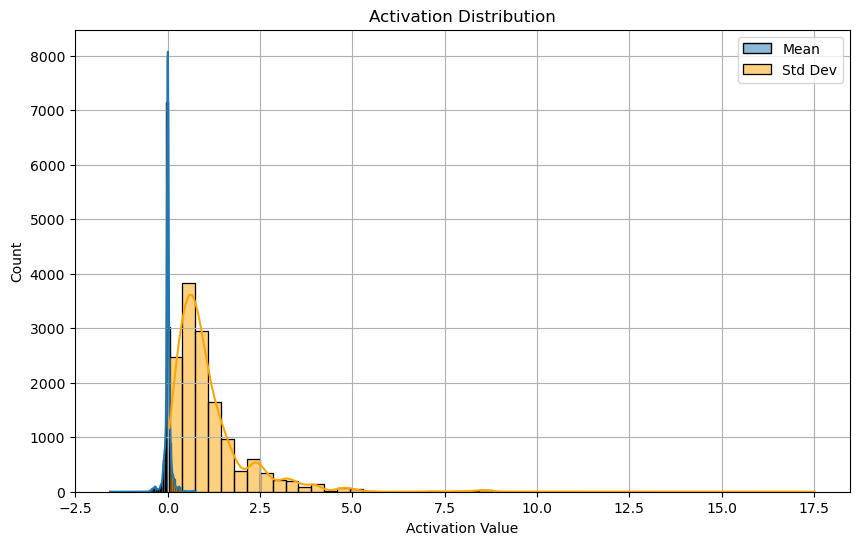

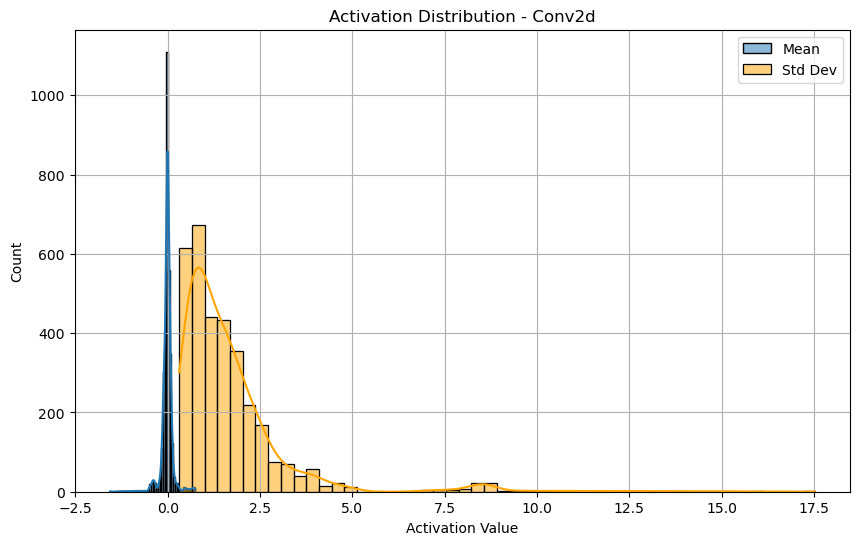

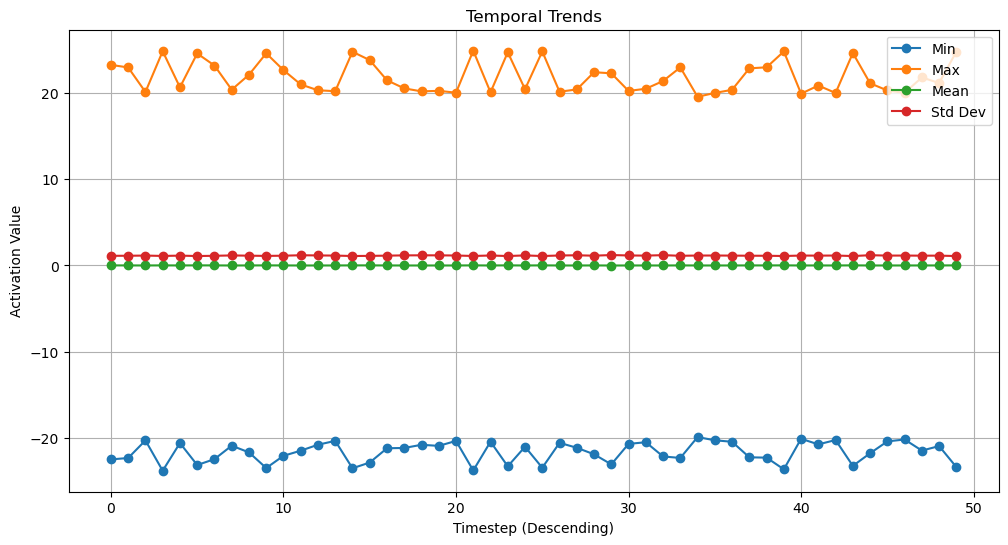

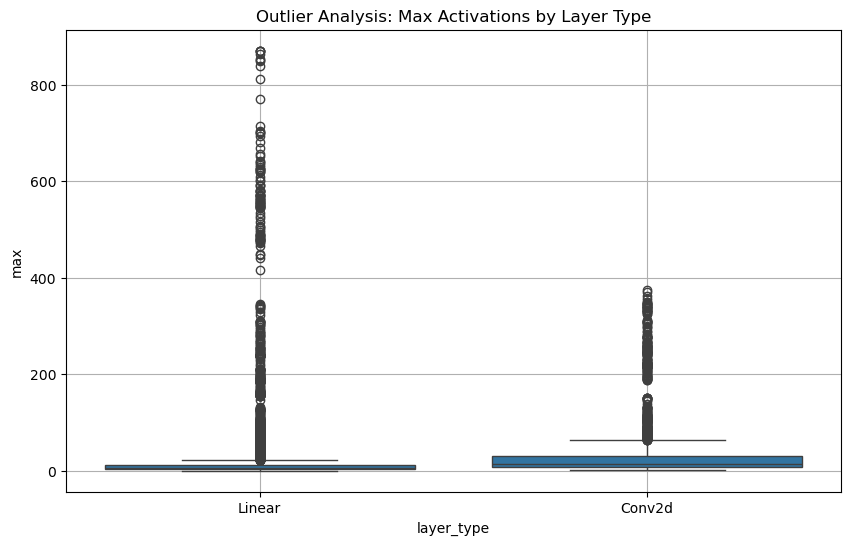

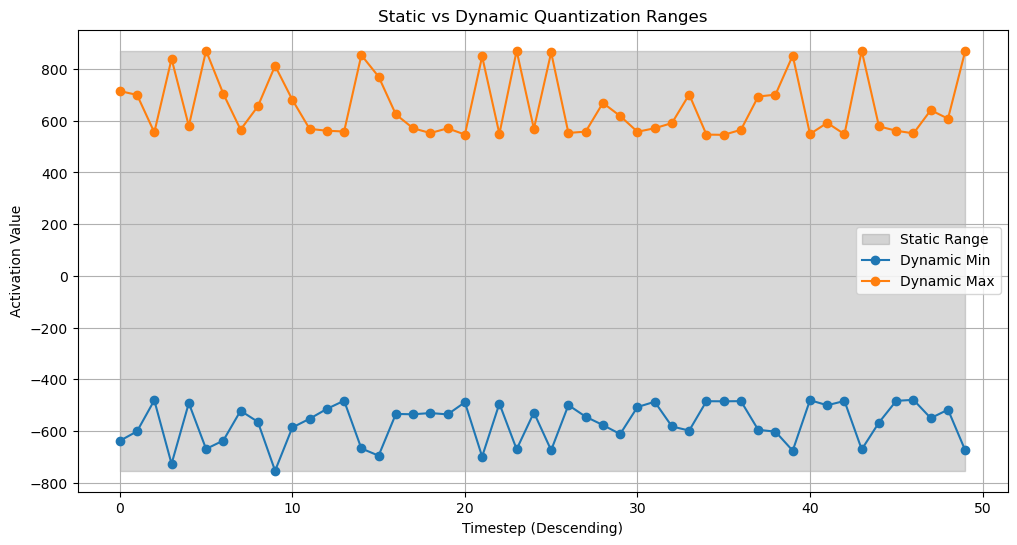

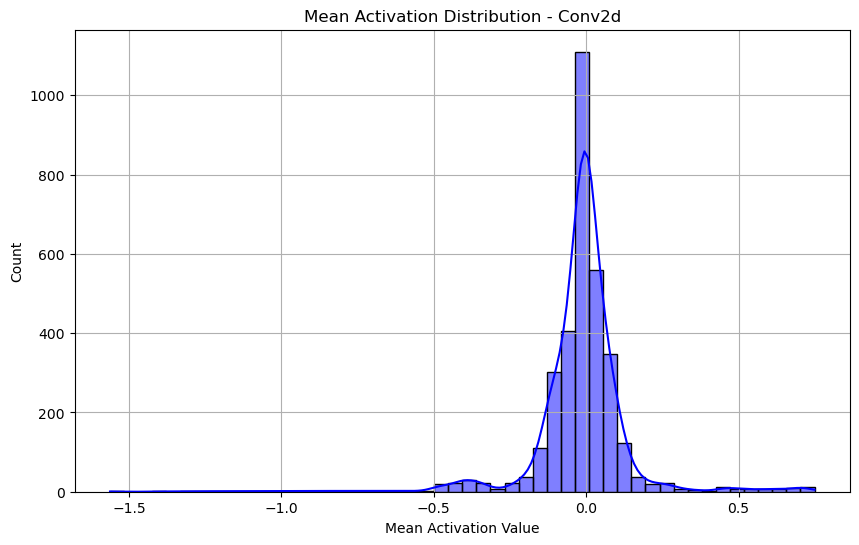

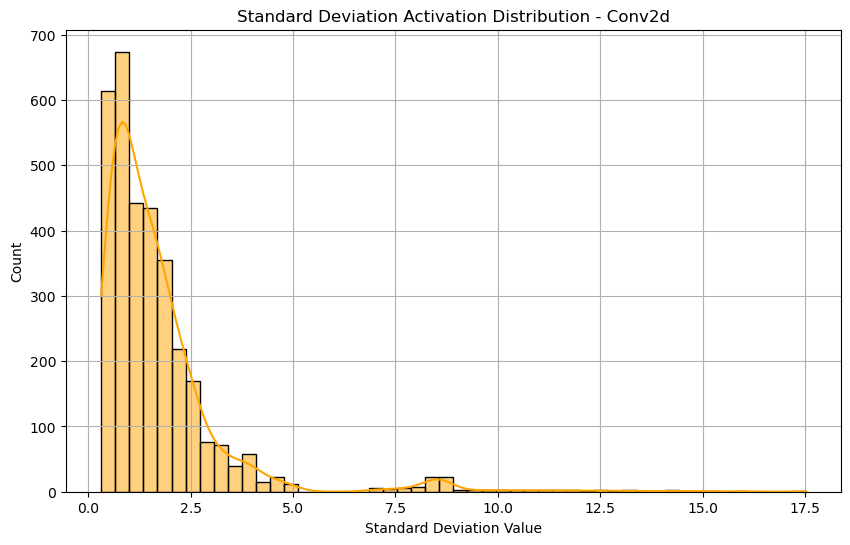

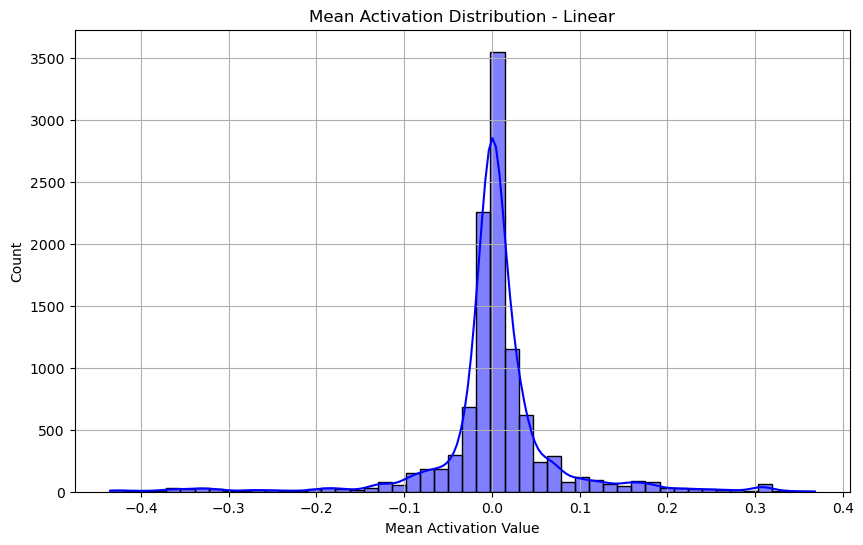

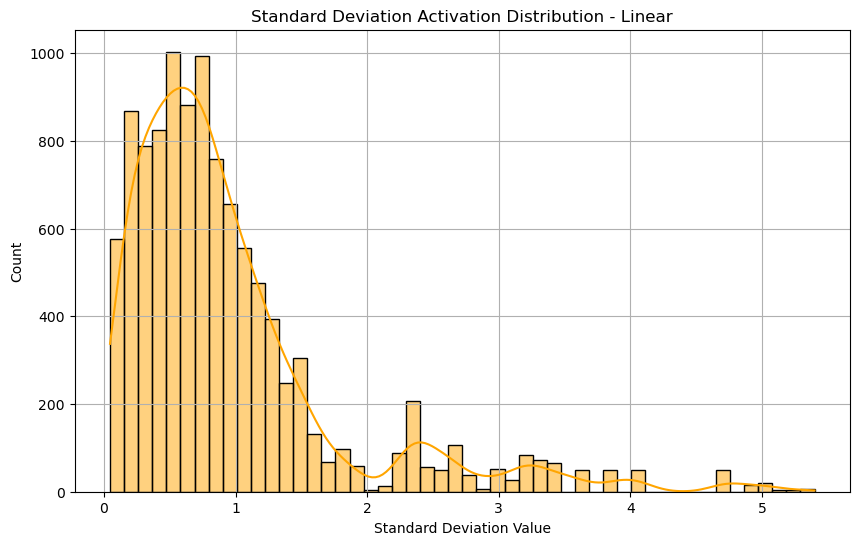

In [8]:
plot_activation_distribution(combined_df)            # Distribution for all layers
plot_activation_distribution(combined_df, "Conv2d")  # Distribution for Conv2d layers
plot_temporal_ranges(combined_df)                    # Temporal trends for all layers
plot_outliers(combined_df)                           # Outlier analysis
compare_quantization_bounds(combined_df)             # Static vs Dynamic bounds
plot_activation_distribution_separate(combined_df, "Conv2d")  # Separate distributions for Conv2d layers
plot_activation_distribution_separate(combined_df, "Linear")  # Separate distributions for Linear layers

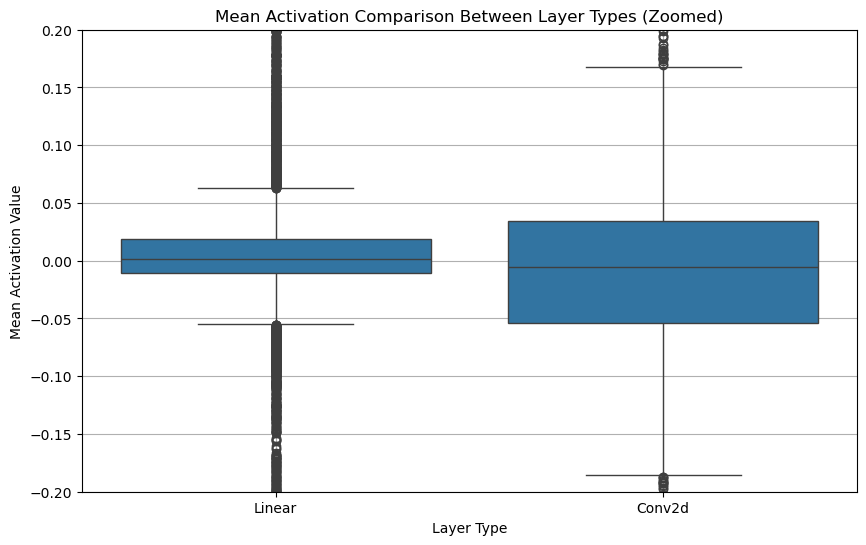

In [9]:
# Plot comparison of mean activations between Conv2d and Linear
plt.figure(figsize=(10, 6))
sns.boxplot(x='layer_type', y='mean', data=combined_df)

# Adjust y-axis limits as needed
plt.ylim(-0.2, 0.2)

plt.title("Mean Activation Comparison Between Layer Types (Zoomed)")
plt.ylabel("Mean Activation Value")
plt.xlabel("Layer Type")
plt.grid(True)


plt.show()



In [10]:
# If no threshold specified, function defaults to the standard
# 1.5 IQR threshold for outlier detection
# I.e. outliers are defined as values below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR (default behavior)

def find_outliers_by_timestep(df, layer_type, column='mean', threshold=1.5):
    """
    Identifies outliers at each timestep for a specific layer type.

    Parameters:
    - df (pd.DataFrame): Combined activation data.
    - layer_type (str): Layer type to filter (e.g., "Conv2d", "Linear").
    - column (str): Column to analyze for outliers (default is 'mean').

    Returns:
    - outliers (pd.DataFrame): DataFrame of outliers with timestep, layer_name, and outlier value.
    """
    # Filter the data by the specified layer type
    filtered_df = df[df['layer_type'] == layer_type]
    
    # Initialize a list to store outliers
    outliers_list = []
    
    # Iterate through each timestep
    for timestep, group in filtered_df.groupby('timestep'):
        # Compute IQR (Interquartile Range)
        q1 = group[column].quantile(0.25)
        q3 = group[column].quantile(0.75)
        iqr = q3 - q1
        
        # Define outlier thresholds
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        
        # Find outliers
        outliers = group[(group[column] < lower_bound) | (group[column] > upper_bound)]
        
        # Append outliers to the list with timestep information
        for _, row in outliers.iterrows():
            outliers_list.append({'timestep': timestep, 'layer_name': row['layer_name'], 'outlier_value': row[column]})
    
    # Convert outliers list to a DataFrame
    outliers_df = pd.DataFrame(outliers_list)
    return outliers_df


In [11]:
# # # I use the 1.5 * IQR rule to identify outliers based on the 'mean' value for Conv2d layers.
# # # Basically, any value below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR is considered an outlier.
# # # Maybe too strict, but it's a common rule of thumb for outlier detection.
# # # You can adjust the threshold as needed in the cell above
# # # We might need to adjust the threshold since activations are tightly clustered around 0.
# # # If no threshold is specified, function will use the default value of 1.5

# Find outliers for Conv2d layers based on 'mean' values
conv2d_outliers = find_outliers_by_timestep(combined_df, layer_type="Conv2d", column='mean')
print("Conv2d Outliers:\n", conv2d_outliers)
print("Conv2d Outliers Count:", len(conv2d_outliers), "\n\n")

# Find outliers for Linear layers based on 'std' values
linear_outliers = find_outliers_by_timestep(combined_df, layer_type="Linear", column='std')
print("Linear Outliers Count:", len(linear_outliers))
print("Linear Outliers:\n", linear_outliers)


Conv2d Outliers:
      timestep                                       layer_name  outlier_value
0           0     diffusion_model.input_blocks.5.0.in_layers.2       0.220629
1           0     diffusion_model.input_blocks.8.0.in_layers.2       0.192454
2           0    diffusion_model.output_blocks.3.0.in_layers.2      -0.356438
3           0    diffusion_model.output_blocks.4.0.in_layers.2       0.313034
4           0    diffusion_model.output_blocks.5.0.in_layers.2      -0.332914
..        ...                                              ...            ...
292        49    diffusion_model.output_blocks.3.0.in_layers.2      -0.338290
293        49    diffusion_model.output_blocks.4.0.in_layers.2       0.455795
294        49           diffusion_model.output_blocks.5.2.conv       0.355421
295        49    diffusion_model.output_blocks.6.0.in_layers.2       0.702439
296        49  diffusion_model.output_blocks.11.0.out_layers.3      -0.482024

[297 rows x 3 columns]
Conv2d Outliers Count:

## Problematic Layers (ignore for now)

This is temporary code we might want to build on for the different quantization types (ignore for now)


In [12]:
# Layers where activations exceed static bounds
static_min, static_max = combined_df['min'].min(), combined_df['max'].max()
problematic_layers = combined_df[
    (combined_df['min'] < static_min) | (combined_df['max'] > static_max)
]
print("Problematic Layers:\n", problematic_layers['layer_name'].unique())


Problematic Layers:
 []


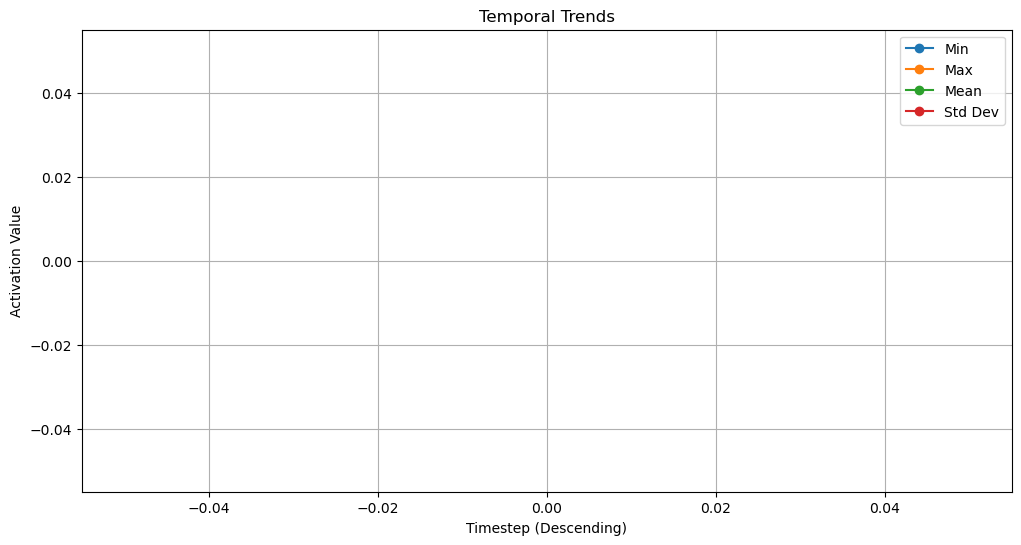

In [13]:
# Plot problematic layers' activation ranges over timesteps
problematic_df = combined_df[combined_df['layer_name'].isin(problematic_layers['layer_name'])]
plot_temporal_ranges(problematic_df)
